In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/') 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Sentiment analysis/AllPosts.csv', encoding= 'unicode_escape')

In [ ]:
dataset.head()

,message,class
0,i think i'm actually gonna do iti planned on d...,suicide
1,Listening to chillsteps andPlanning on a certa...,suicide
2,"For the past 3 days, all I can think about is ...",suicide
3,"If I ever do a suicid e charge, put me in the ...",normal
4,Hey you. Yea. You. Play among us. Iâm hostin...,normal


In [ ]:
#df_filtered = df[df['class'] >= 25]

In [ ]:
dataset['class'].value_counts()

normal        124012
suicide       116033
depression      2314
Name: class, dtype: int64

In [ ]:
dataset = dataset.iloc[0:100000, :]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   message  100000 non-null  object
 1   class    100000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [ ]:
X = dataset.iloc[ : ,:-1]
Y = dataset.iloc[ : ,1:2]

In [ ]:
X

,message
0,i think i'm actually gonna do iti planned on d...
1,Listening to chillsteps andPlanning on a certa...
2,"For the past 3 days, all I can think about is ..."
3,"If I ever do a suicid e charge, put me in the ..."
4,Hey you. Yea. You. Play among us. Iâm hostin...
...,...
99995,I am horny That girl is so attractive man\n\nB...
99996,I think I have realized somewhat why straight ...
99997,No will to live anymoreI've been depressed sin...
99998,Need help with my suicidal motherHey guys! So ...


In [ ]:
Y.value_counts()

class     
normal        51222
suicide       47796
depression      982
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   message  100000 non-null  object
 1   class    100000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [ ]:
! pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-zq2aqjsq
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-zq2aqjsq
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11756 sha256=192194066933899a418fb3256404adaa173df3a64949e3051b65c4e74944d675
  Stored in directory: /tmp/pip-ephem-wheel-cache-nhof1zn0/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


In [ ]:
import preprocess_kgptalkie as ps
import re

In [ ]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [ ]:
dataset['message'] = dataset['message'].apply(lambda x: get_clean(x))

**SVM**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
tfidf = TfidfVectorizer(max_features=40000, ngram_range=(1,5),  stop_words='english' , analyzer='word')

In [ ]:
dataset['message']

0        i think i am actually gonna do iti planned on ...
1        listening to chillsteps andplanning on a certa...
2        for the past 3 days all i can think about is s...
3        if i ever do a suicid e charge put me in the l...
4        hey you yea you play among us iam hosting a ga...
                               ...                        
99995    i am horny that girl is so attractive manbut s...
99996    i think i have realized somewhat why straight ...
99997    no will to live anymoreive been depressed sinc...
99998    need help with my suicidal motherhey guys so m...
99999    i canat anymorei donat wanna live in this fuck...
Name: message, Length: 100000, dtype: object

In [ ]:
X = tfidf.fit_transform(dataset['message'])
Y = dataset['class']

In [ ]:
X.shape, Y.shape

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
svm = LinearSVC(C=10, class_weight='balanced')
svm.fit(X_train, Y_train)

In [ ]:
SVM_pred = svm.predict(X_test)

In [ ]:
SVM_acc = accuracy_score(Y_test, SVM_pred)
print(SVM_acc)

0.91115


In [ ]:
print(classification_report(Y_test, SVM_pred))

              precision    recall  f1-score   support

  depression       0.89      0.75      0.82       179
      normal       0.91      0.92      0.91     10209
     suicide       0.91      0.91      0.91      9612

    accuracy                           0.91     20000
   macro avg       0.90      0.86      0.88     20000
weighted avg       0.91      0.91      0.91     20000



In [ ]:
x = 'this product is really bad. I do not like it'
x = get_clean(x)
vec = tfidf.transform([x])
svm.predict(vec)

array(['normal'], dtype=object)

In [ ]:
x = 'this product is really good. I liked it so much'
x = get_clean(x)
vec = tfidf.transform([x])
svm.predict(vec)

array(['normal'], dtype=object)

Text(0.5, 145.31999999999996, 'Predicted')

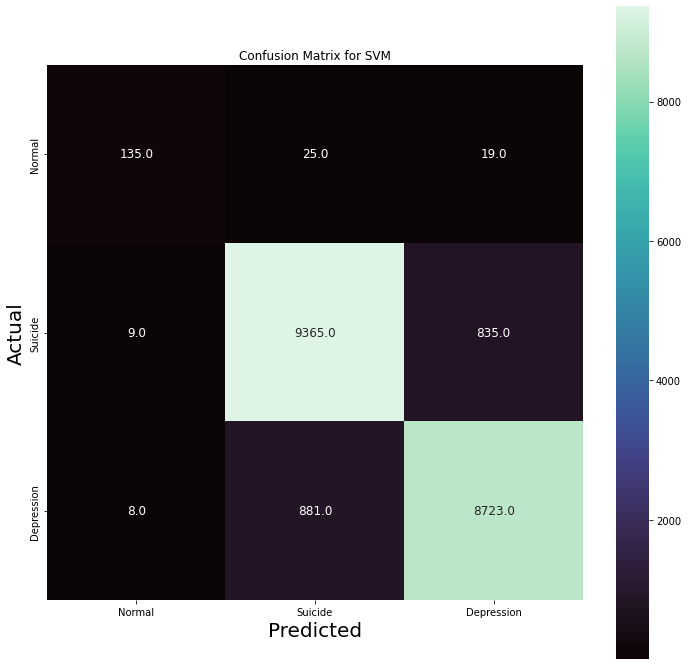

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = SVM_pred
label=['Normal', 'Suicide','Depression']
Ytrue = Y_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for SVM")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score